Importación de librerías 

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Limpieza de los datos  

Importación del archivo de Excel 

In [7]:
df = pd.read_csv("C:/Users/mscas/Dropbox/Mi PC (DESKTOP-9A2BT35)/Downloads/datos_dummy.csv")
df 

,fecha_transaccion,id_sim,fecha_activacion,tipo_transaccion,id_vendedor,precio_de_venta,bodega,id_company,costo_venta
0,2023-03-02,NaN,2022-08-26,alta,1.0,100.0,3.0,1.0,200.0
1,2023-03-20,3966.0,2023-02-04,alta,42.0,5000.0,3.0,1.0,100.0
2,2023-04-28,2798.0,2023-03-06,alta,32.0,200.0,5.0,1.0,230.0
3,2023-05-05,3062.0,2022-09-05,alta,39.0,5000.0,1.0,1.0,200.0
4,2023-05-17,1512.0,2023-04-08,alta,26.0,50.0,4.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...
44995,2023-01-06,4617.0,2023-01-06,alta,1.0,500.0,5.0,1.0,230.0
44996,NaN,4957.0,2023-01-31,recarga,31.0,200.0,4.0,1.0,200.0
44997,2023-05-23,3101.0,2023-01-25,alta,45.0,50.0,2.0,1.0,30.0
44998,2023-04-12,8420.0,2022-10-22,recarga,7.0,100.0,2.0,1.0,100.0


Información de los datos

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fecha_transaccion  40482 non-null  object 
 1   id_sim             40602 non-null  float64
 2   fecha_activacion   40560 non-null  object 
 3   tipo_transaccion   40473 non-null  object 
 4   id_vendedor        40532 non-null  float64
 5   precio_de_venta    40544 non-null  float64
 6   bodega             40589 non-null  float64
 7   id_company         40413 non-null  float64
 8   costo_venta        40586 non-null  float64
dtypes: float64(6), object(3)
memory usage: 3.1+ MB


In [9]:
#Cuantas filas y columnas hay dentro de mi dataframe
df.shape

(45000, 9)

Verificación de los datos nulos

In [10]:
#completitud_datos_nulos, calcula la proporción de valores nulos de cada columna del DataFrame, y lo devuelve en orden descendente.
def completitud_datos_nulos(df):
    return df.isnull().sum().sort_values(ascending=False) / df.shape[0]

In [11]:
df.isnull().sum().sort_values(ascending=False) / df.shape[0]

id_company           0.101933
tipo_transaccion     0.100600
fecha_transaccion    0.100400
id_vendedor          0.099289
precio_de_venta      0.099022
fecha_activacion     0.098667
costo_venta          0.098089
bodega               0.098022
id_sim               0.097733
dtype: float64

Conteo de los datos nulos 

In [12]:
datos_nulos = df.isnull().sum()
datos_nulos 


fecha_transaccion    4518
id_sim               4398
fecha_activacion     4440
tipo_transaccion     4527
id_vendedor          4468
precio_de_venta      4456
bodega               4411
id_company           4587
costo_venta          4414
dtype: int64

Verificación de datos duplicados


In [13]:
duplicados = df.duplicated().sum()
print("Número de filas duplicadas:", duplicados)


Número de filas duplicadas: 0


Imputación de los datos nulos

Pondré un número para identificar los datos nulos de cada columna, para que con ello, se haga la limpieza 

In [14]:
fecha_especifica = pd.to_datetime('1900-09-24').date()
df['fecha_transaccion'].fillna(fecha_especifica, inplace=True)



In [15]:
columna2 = 'id_sim'
numero_identificacion2 = -222  # Número para identificar los valores nulos

df[columna2].fillna(numero_identificacion2, inplace=True)

In [16]:
fecha_especifica2 = pd.to_datetime('1900-09-24').date()
df['fecha_activacion'].fillna(fecha_especifica2, inplace=True)


In [17]:
columna4 = 'tipo_transaccion'
numero_identificacion4 = 'Transaccion Nula'  # Número para identificar los valores nulos

df[columna4].fillna(numero_identificacion4, inplace=True)

In [18]:
columna5 = 'id_vendedor'
numero_identificacion5 = -555  # Número para identificar los valores nulos

df[columna5].fillna(numero_identificacion5, inplace=True)

In [19]:
columna6 = 'precio_de_venta'
numero_identificacion6 = -666  # Número para identificar los valores nulos

df[columna6].fillna(numero_identificacion6, inplace=True)

In [20]:
columna7 = 'bodega'
numero_identificacion7 = -777  # Número para identificar los valores nulos

df[columna7].fillna(numero_identificacion7, inplace=True)

In [21]:
columna8= 'id_company'
numero_identificacion8 = -888  # Número para identificar los valores nulos

df[columna8].fillna(numero_identificacion8, inplace=True)

In [22]:
columna9= 'costo_venta'
numero_identificacion9 = -999  # Número para identificar los valores nulos

df[columna9].fillna(numero_identificacion9, inplace=True)

Guardar los cambios

In [23]:
df.to_csv('C:/Users/mscas/Dropbox/Mi PC (DESKTOP-9A2BT35)/Downloads/datos_dummy_actualizado.csv', index=False)
df 


,fecha_transaccion,id_sim,fecha_activacion,tipo_transaccion,id_vendedor,precio_de_venta,bodega,id_company,costo_venta
0,2023-03-02,-222.0,2022-08-26,alta,1.0,100.0,3.0,1.0,200.0
1,2023-03-20,3966.0,2023-02-04,alta,42.0,5000.0,3.0,1.0,100.0
2,2023-04-28,2798.0,2023-03-06,alta,32.0,200.0,5.0,1.0,230.0
3,2023-05-05,3062.0,2022-09-05,alta,39.0,5000.0,1.0,1.0,200.0
4,2023-05-17,1512.0,2023-04-08,alta,26.0,50.0,4.0,1.0,-999.0
...,...,...,...,...,...,...,...,...,...
44995,2023-01-06,4617.0,2023-01-06,alta,1.0,500.0,5.0,1.0,230.0
44996,1900-09-24,4957.0,2023-01-31,recarga,31.0,200.0,4.0,1.0,200.0
44997,2023-05-23,3101.0,2023-01-25,alta,45.0,50.0,2.0,1.0,30.0
44998,2023-04-12,8420.0,2022-10-22,recarga,7.0,100.0,2.0,1.0,100.0


Verificamos nuevamente que no haya Datos nulos

In [24]:
def completitud_datos_nulos(df):
    return df.isnull().sum().sort_values(ascending=False) / df.shape[0]

In [25]:
df.isnull().sum().sort_values(ascending=False) / df.shape[0]

fecha_transaccion    0.0
id_sim               0.0
fecha_activacion     0.0
tipo_transaccion     0.0
id_vendedor          0.0
precio_de_venta      0.0
bodega               0.0
id_company           0.0
costo_venta          0.0
dtype: float64

# Transformación de los datos

In [26]:
# Convertir la columna a formato de fecha de la transacción:
df['fecha_transaccion'] = pd.to_datetime(df['fecha_transaccion'])


In [27]:
#Extraer información de la fecha, como el año, mes o día:
df['año'] = df['fecha_transaccion'].dt.year
df['mes'] = df['fecha_transaccion'].dt.month
df['dia'] = df['fecha_transaccion'].dt.day

In [28]:
# Convertir la columna a formato de fecha de la transacción:
df['fecha_activacion'] = pd.to_datetime(df['fecha_activacion'])


In [29]:
#Extraer información de la fecha de activación, como el año, mes o día:
df['año_a'] = df['fecha_activacion'].dt.year
df['mes_a'] = df['fecha_activacion'].dt.month
df['dia_a'] = df['fecha_activacion'].dt.day

In [30]:
#Hacer la columna de tipo de transacción a categórico
df['tipo_transaccion'] = df['tipo_transaccion'].astype('category')


# Análisis exploratorio

In [31]:
df.describe()

,fecha_transaccion,id_sim,fecha_activacion,id_vendedor,precio_de_venta,bodega,id_company,costo_venta,año,mes,dia,año_a,mes_a,dia_a
count,45000,45000.000000,45000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.00000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,2010-11-28 19:38:18.239999744,4945.486889,2010-11-26 05:49:28.320000256,-32.185422,994.475644,-73.455200,-89.618733,93.730533,2010.65080,3.618556,16.447622,2010.411422,6.408133,16.014400
min,1900-09-24 00:00:00,-222.000000,1900-09-24 00:00:00,-555.000000,-666.000000,-777.000000,-888.000000,-999.000000,1900.00000,1.000000,1.000000,1900.000000,1.000000,1.000000
25%,2023-01-26 00:00:00,2502.000000,2022-09-21 00:00:00,9.000000,50.000000,1.000000,1.000000,30.000000,2023.00000,2.000000,9.000000,2022.000000,2.000000,8.000000
50%,2023-03-09 00:00:00,5033.000000,2022-12-14 00:00:00,23.000000,200.000000,3.000000,1.000000,200.000000,2023.00000,3.000000,17.000000,2022.000000,8.000000,17.000000
75%,2023-04-20 00:00:00,7520.000000,2023-02-08 00:00:00,36.000000,500.000000,4.000000,1.000000,230.000000,2023.00000,5.000000,24.000000,2023.000000,10.000000,24.000000
max,2023-05-31 00:00:00,9998.000000,2023-05-30 00:00:00,50.000000,5000.000000,5.000000,1.000000,500.000000,2023.00000,9.000000,31.000000,2023.000000,12.000000,31.000000
std,NaN,3003.597368,NaN,174.118926,1910.764421,231.935994,268.979380,391.244303,36.96592,2.250010,8.667574,36.534066,4.001828,8.734991


<Axes: >

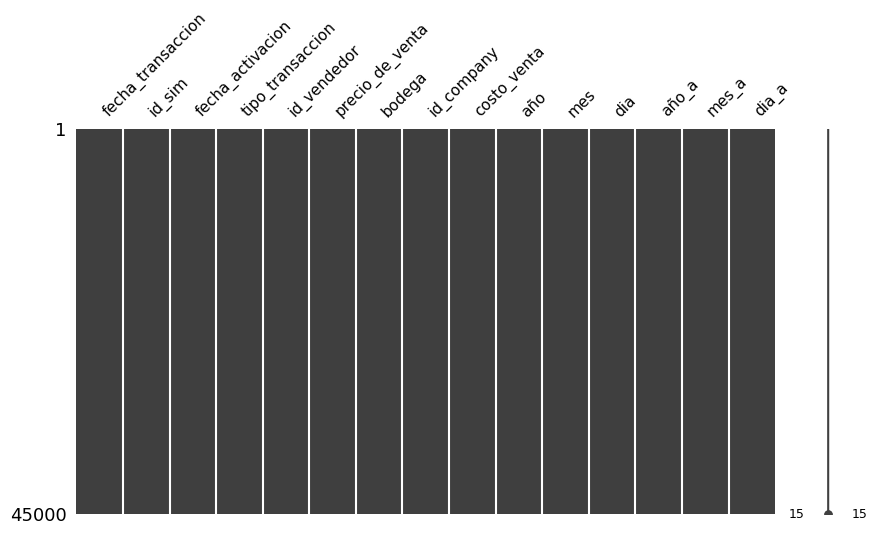

In [32]:
#matriz de visualización de valores nulos
msno.matrix(df, figsize=(10,5), fontsize=11)


Definición de variables continuas y categóricas

In [33]:
var_continua = [x for x in list(df.describe())]
var_continua

['fecha_transaccion',
 'id_sim',
 'fecha_activacion',
 'id_vendedor',
 'precio_de_venta',
 'bodega',
 'id_company',
 'costo_venta',
 'año',
 'mes',
 'dia',
 'año_a',
 'mes_a',
 'dia_a']

In [34]:
var_categorica = [x for x in df.columns if x not in var_continua+['FECHA']]
var_categorica

['tipo_transaccion']

Exploración de la estructura de los datos

In [35]:
print(df.head())  # Muestra las primeras filas del DataFrame
print(df.info())  # Proporciona información sobre las columnas y los tipos de datos
print(df.describe())  # Calcula estadísticas descriptivas


  fecha_transaccion  id_sim fecha_activacion tipo_transaccion  id_vendedor   
0        2023-03-02  -222.0       2022-08-26             alta          1.0  \
1        2023-03-20  3966.0       2023-02-04             alta         42.0   
2        2023-04-28  2798.0       2023-03-06             alta         32.0   
3        2023-05-05  3062.0       2022-09-05             alta         39.0   
4        2023-05-17  1512.0       2023-04-08             alta         26.0   

   precio_de_venta  bodega  id_company  costo_venta   año  mes  dia  año_a   
0            100.0     3.0         1.0        200.0  2023    3    2   2022  \
1           5000.0     3.0         1.0        100.0  2023    3   20   2023   
2            200.0     5.0         1.0        230.0  2023    4   28   2023   
3           5000.0     1.0         1.0        200.0  2023    5    5   2022   
4             50.0     4.0         1.0       -999.0  2023    5   17   2023   

   mes_a  dia_a  
0      8     26  
1      2      4  
2      3

                   fecha_transaccion        id_sim   
count                          45000  45000.000000  \
mean   2010-11-28 19:38:18.239999744   4945.486889   
min              1900-09-24 00:00:00   -222.000000   
25%              2023-01-26 00:00:00   2502.000000   
50%              2023-03-09 00:00:00   5033.000000   
75%              2023-04-20 00:00:00   7520.000000   
max              2023-05-31 00:00:00   9998.000000   
std                              NaN   3003.597368   

                    fecha_activacion   id_vendedor  precio_de_venta   
count                          45000  45000.000000     45000.000000  \
mean   2010-11-26 05:49:28.320000256    -32.185422       994.475644   
min              1900-09-24 00:00:00   -555.000000      -666.000000   
25%              2022-09-21 00:00:00      9.000000        50.000000   
50%              2022-12-14 00:00:00     23.000000       200.000000   
75%              2023-02-08 00:00:00     36.000000       500.000000   
max             

Histograma

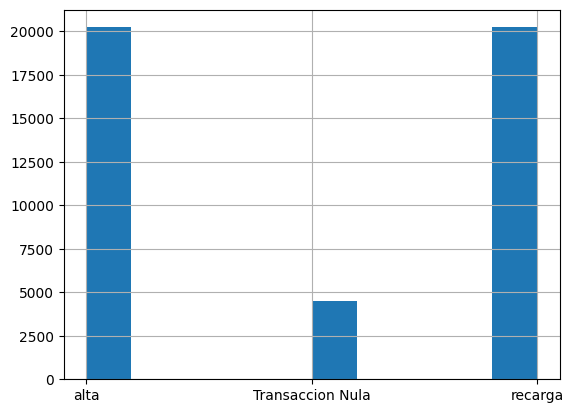

In [36]:
# Generar histograma del tipo de transacción
df['tipo_transaccion'].hist()

# Mostrar el gráfico
plt.show()

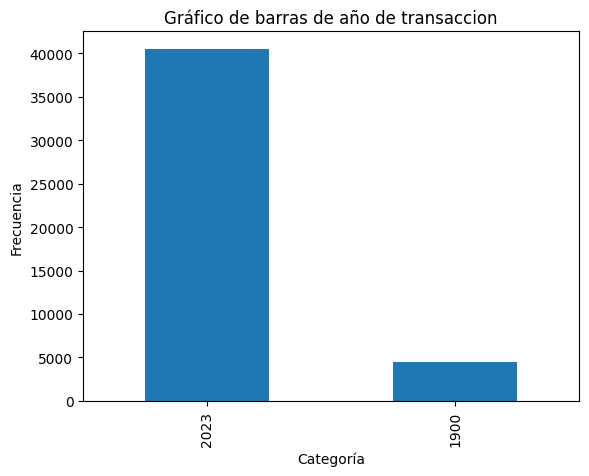

In [38]:
#De cada año de transacción
df['año'].value_counts().plot(kind='bar')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')
plt.title('Gráfico de barras de año de transaccion')
plt.show()

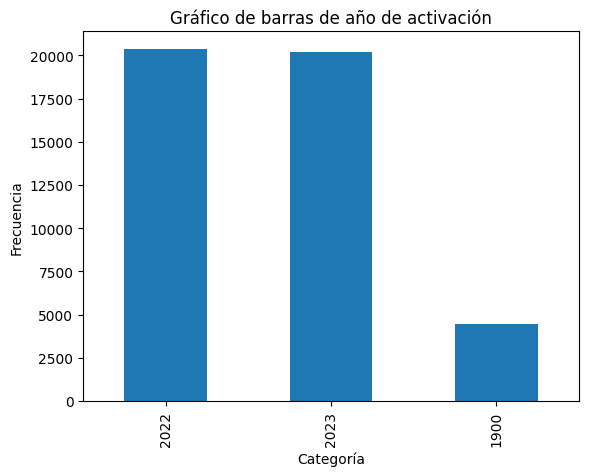

In [39]:
#De cada año de activación
df['año_a'].value_counts().plot(kind='bar')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')
plt.title('Gráfico de barras de año de activación')
plt.show()

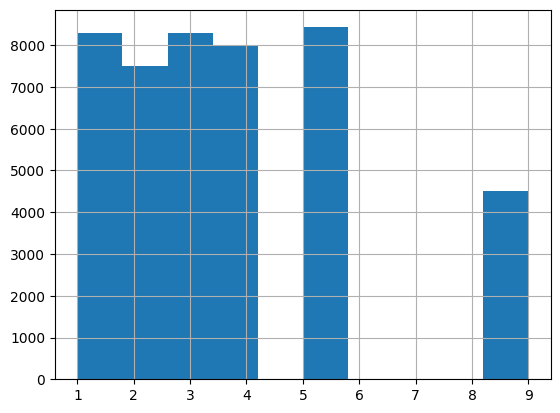

In [57]:
# Generar histograma del mes de transacción
df['mes'].hist()

# Mostrar el gráfico
plt.show()

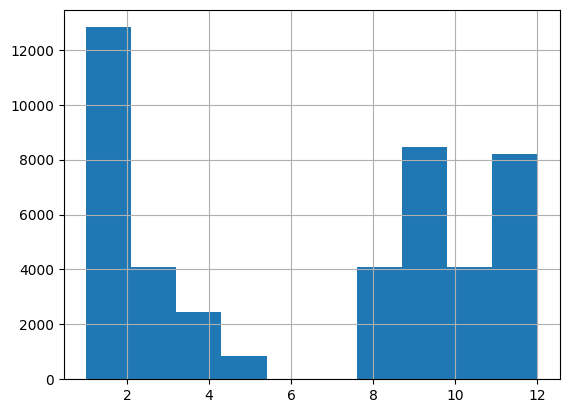

In [58]:
# Generar histograma del mes de activación
df['mes_a'].hist()

# Mostrar el gráfico
plt.show()

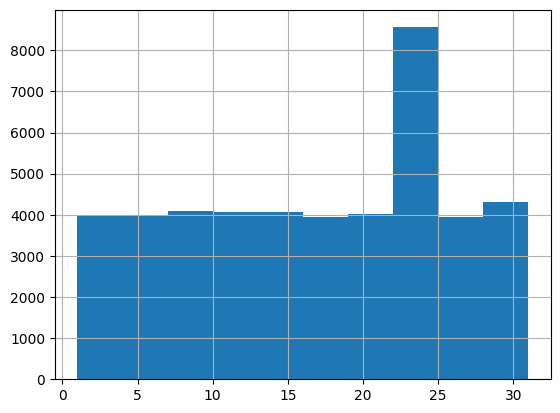

In [62]:
# Generar histograma del dia con mayor frecuencia de transacción
df['dia'].hist()

# Mostrar el gráfico
plt.show()

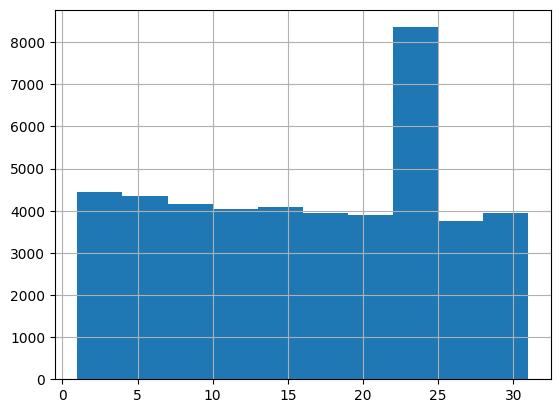

In [63]:
# Generar histograma del dia con mayor frecuencia de activacion
df['dia_a'].hist()

# Mostrar el gráfico
plt.show()

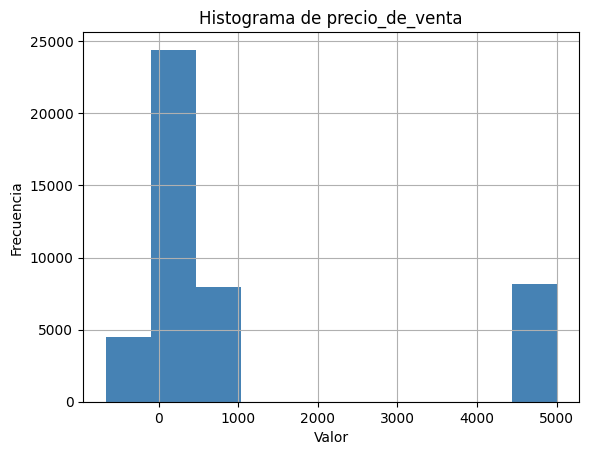

In [54]:
df['precio_de_venta'].hist(bins=10, color='steelblue')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Histograma de precio_de_venta')
plt.show()


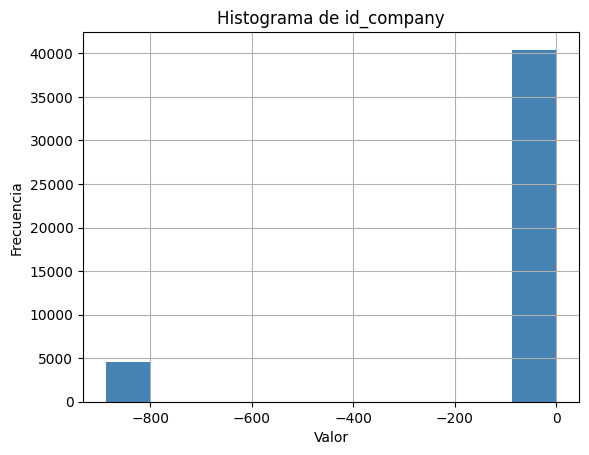

In [42]:
df['id_company'].hist(bins=10, color='steelblue')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Histograma de id_company')
plt.show()


# Visualización general de los datos

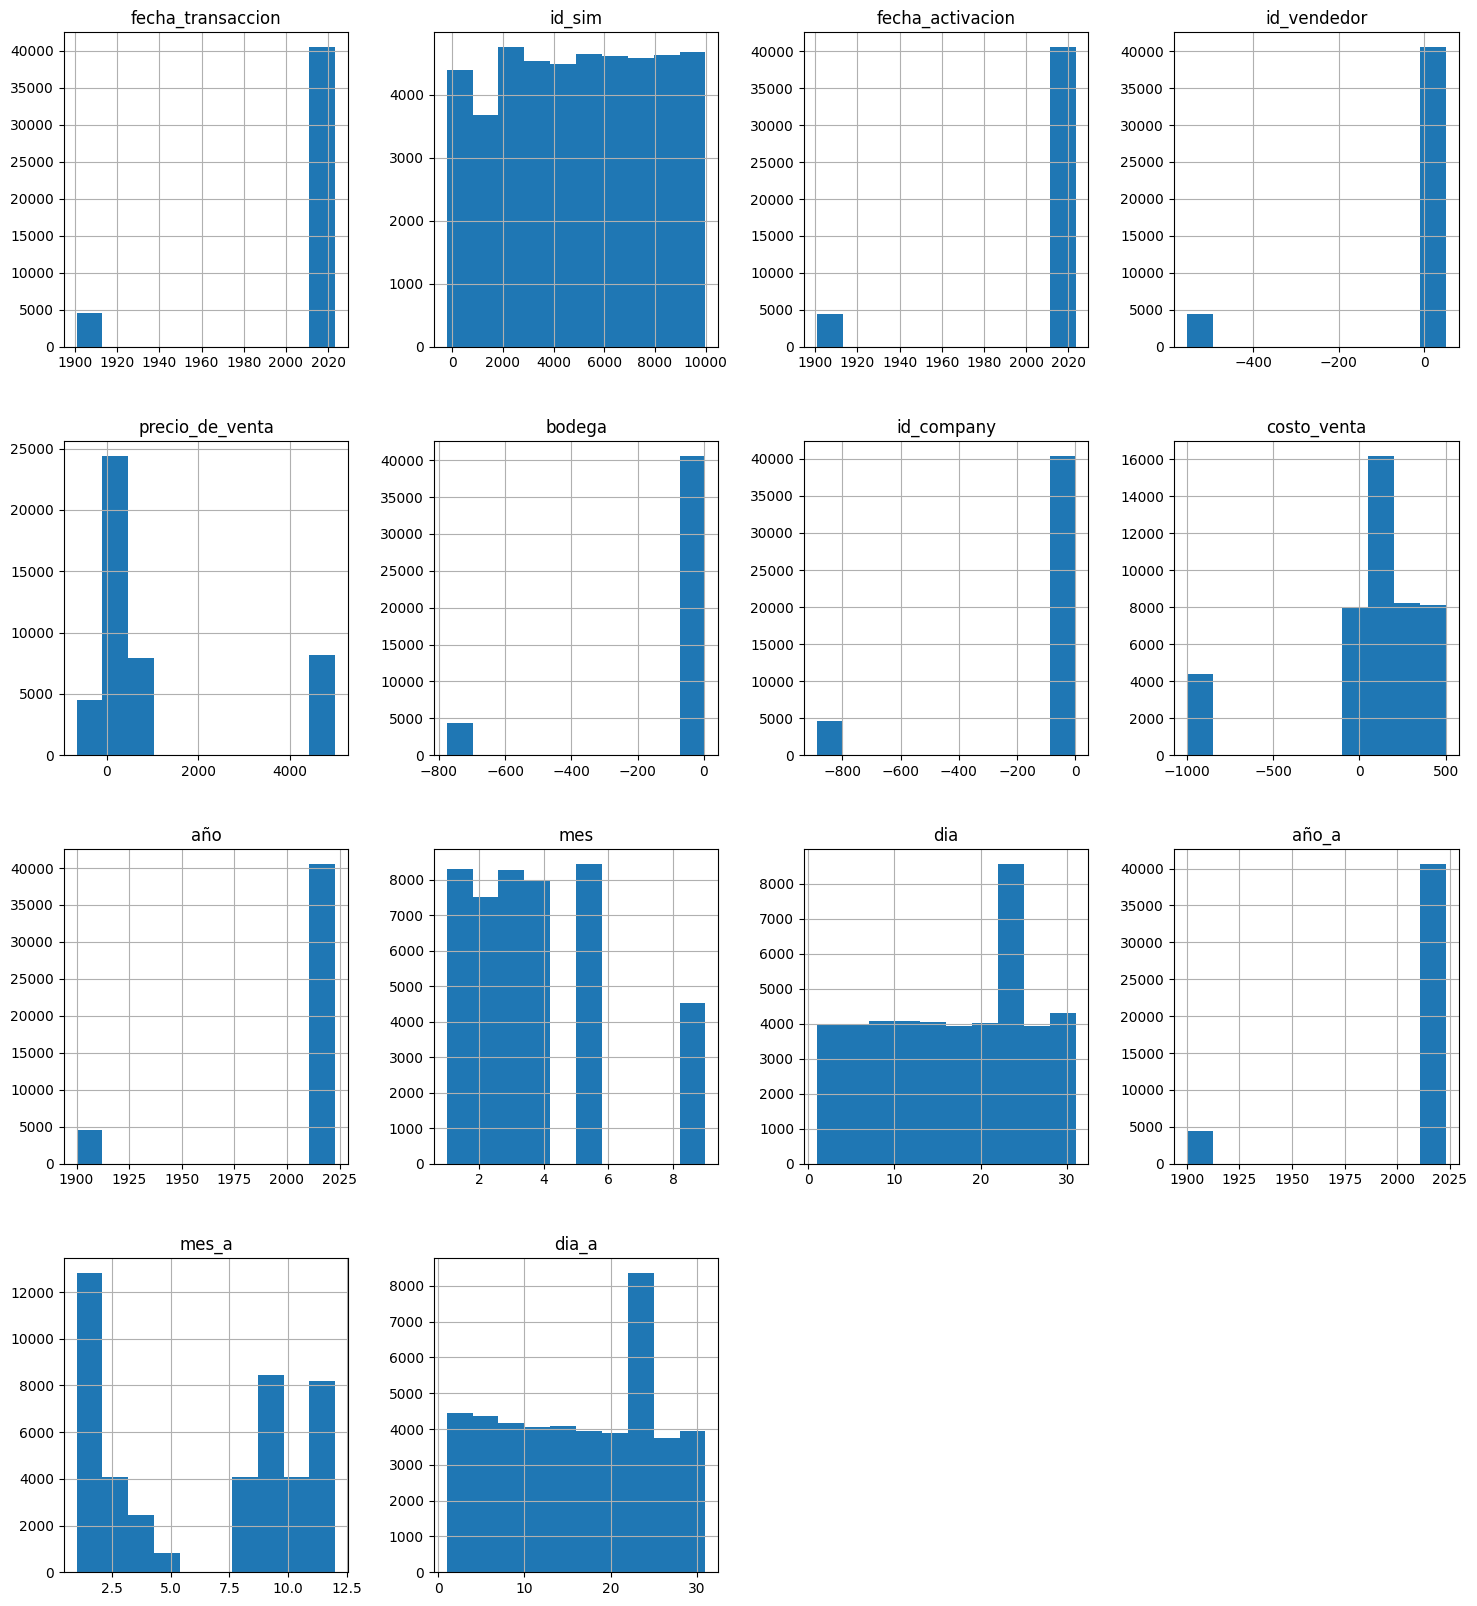

In [48]:
df[var_continua].hist(figsize=(18,20));

# Conclusiones

A pesar de que contenía datos nulos el archivo csv y que no presentaba un duplicado en ello, con la ayuda de pandas y de una manera rápida, se pudo ingresar datos a los espacios en blanco de acuerdo a su tipo de dato para comenzar con el análisis. 

Realicé la transformación de los datos para ver con más detalle, en qué meses y días hay una mayor tendencia sobre la fecha de transacción y activación. Con ello, podemos concluir que los clientes con mayor frecuencia hacen estos movimientos a finales de cada mes. Creo que una de las razones de ello es que los usuarios pueden estar conscientes de que su saldo o beneficios están a punto de expirar, y sobre todo,les permite evaluar cuánto han gastado y ajustar su presupuesto para el próximo período.

En general, se muestra una misma tendencia con la alta y activación del servicio. Mientras que los datos nulos representan que algunos usuarios ya no quisieron darse de alta nuevamente o también no se ha activado nuevamente su servicio

En los primeros meses del año, se da una mayor tendencia de transacción, mientras que de activación no hay mucha una tendencía sobre la activación de su plan, va variando igual de la época del año